In [161]:
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import PolynomialFeatures

In [162]:
data = pd.read_csv("waterquality.csv", encoding = "ISO-8859-1")
df = pd.DataFrame(data)

In [163]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [164]:
for_cleaning = df[['TEMP', 'DO', 'pH', 'CONDUCTIVITY', 'BOD']]
df = clean_dataset(for_cleaning)
X = df[['TEMP', 'DO', 'pH', 'CONDUCTIVITY']]
df

C:\Users\DELL\AppData\Local\Temp/ipykernel_4300/1442344577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,TEMP,DO,pH,CONDUCTIVITY,BOD
0,29.2,6.4,8.1,735.0,3.4
1,24.5,6.0,8.0,270.0,3.1
2,25.8,5.5,7.8,355.0,4.2
3,24.8,5.5,7.8,371.0,5.6
4,25.7,5.7,7.9,294.0,3.2
...,...,...,...,...,...
529,23.2,4.4,8.1,538.0,1.2
530,22.9,5.6,8.4,591.0,1.1
531,22.9,5.8,8.5,588.0,1.2
532,28.7,4.1,7.9,1133.0,2.3


In [165]:
print(X.head())
print(np.any(np.isnan(X)))

   TEMP   DO   pH  CONDUCTIVITY
0  29.2  6.4  8.1         735.0
1  24.5  6.0  8.0         270.0
2  25.8  5.5  7.8         355.0
3  24.8  5.5  7.8         371.0
4  25.7  5.7  7.9         294.0
False


In [166]:
y = df[['BOD']]

In [167]:
print(y.shape[0])
print(y.head())

496
   BOD
0  3.4
1  3.1
2  4.2
3  5.6
4  3.2


In [168]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape, y_train.shape

((347, 4), (149, 4), (347, 1))

In [169]:
#normalizing data
# from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures 
# # define min max scaler
# x = X_train.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(x)
# df1 = pd.DataFrame(X_train_scaled)
# df1.columns = ['TEMP','DO', 'pH', 'CONDUCTIVITY']
# df1 = df1.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [170]:
# x = X_test.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# X_test_scaled = min_max_scaler.fit_transform(x)
# df2 = pd.DataFrame(X_test_scaled)
# df2.columns = ['TEMP','DO', 'pH', 'CONDUCTIVITY']
# df2 = df2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
# df2.shape

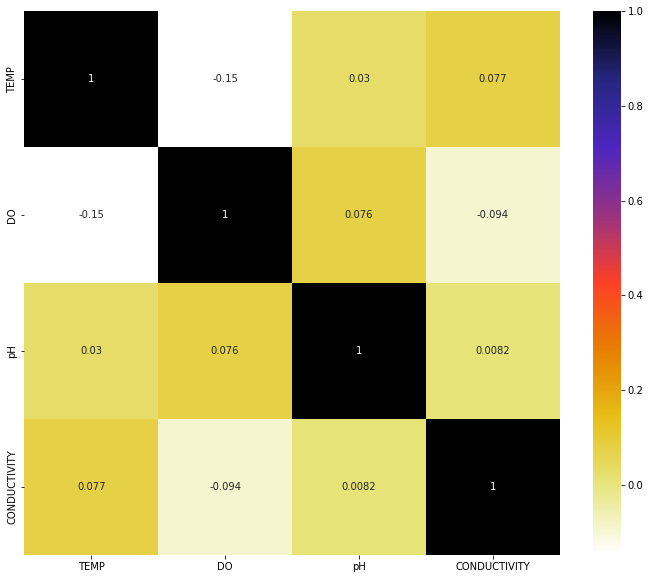

In [171]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
df2 = df[['TEMP', 'DO', 'pH', 'CONDUCTIVITY']]
df2 = df2.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
cor = df2.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [172]:
# X_train_scaled
y_train
X_train

,TEMP,DO,pH,CONDUCTIVITY
5,25.0,4.5,7.5,513.0
157,24.4,8.1,7.7,108.0
407,21.4,7.3,8.0,386.0
151,26.9,6.7,7.7,78.0
527,21.3,5.0,8.6,604.0
...,...,...,...,...
347,24.6,6.4,7.3,467.0
214,24.0,7.7,6.6,177.0
127,27.6,7.0,7.8,669.0
57,24.4,8.5,8.3,404.0


In [65]:
X_train['TEMP'] = X_train['TEMP'].replace((np.inf, -np.inf, np.nan), X_train['TEMP'].mean()).reset_index(drop=True)
X_train['DO'] = X_train['DO'].replace((np.inf, -np.inf, np.nan), X_train['DO'].mean()).reset_index(drop=True)
X_train['pH'] = X_train['pH'].replace((np.inf, -np.inf, np.nan), X_train['pH'].mean()).reset_index(drop=True)
X_train['CONDUCTIVITY'] = X_train['CONDUCTIVITY'].replace((np.inf, -np.inf, np.nan), X_train['CONDUCTIVITY'].mean()).reset_index(drop=True)


In [42]:
y_train = y_train.replace((np.inf, -np.inf, np.nan), y_train['BOD'].mean()).reset_index(drop=True)

In [43]:
X_test['TEMP'] = X_test['TEMP'].replace((np.inf, -np.inf, np.nan), X_test['TEMP'].mean()).reset_index(drop=True)
X_test['DO'] = X_test['DO'].replace((np.inf, -np.inf, np.nan), X_test['DO'].mean()).reset_index(drop=True)
X_test['pH'] = X_test['pH'].replace((np.inf, -np.inf, np.nan), X_test['pH'].mean()).reset_index(drop=True)
X_test['CONDUCTIVITY'] = X_test['CONDUCTIVITY'].replace((np.inf, -np.inf, np.nan), X_test['CONDUCTIVITY'].mean()).reset_index(drop=True)


In [44]:
y_test = y_test.replace((np.inf, -np.inf, np.nan), y_test['BOD'].mean()).reset_index(drop=True)

In [173]:
# creating a regression model

model = LinearRegression()
# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [174]:
predictions = model.predict(X_test)

In [175]:
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  37.2491226991195
mean_absolute_error :  3.8592030270116746


In [176]:
print(f"Predicted: {predictions[100]}")
#df3 = pd.DataFrame(predictions)
#df3.columns = ["BOD"]
print(y_test.iloc[100])

Predicted: [0.09295541]
BOD    1.8
Name: 117, dtype: float64


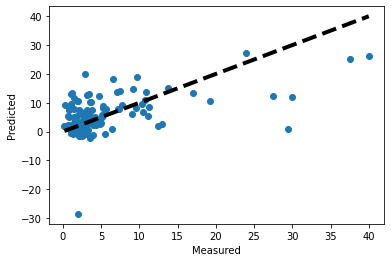

In [134]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [177]:
print("Accuracy on training set:", model.score(X_train, y_train))

Accuracy on training set: 0.4138752571703448


In [178]:
poly = PolynomialFeatures(degree = 3, include_bias = False)
poly

PolynomialFeatures(degree=3, include_bias=False)

In [179]:
poly_features = poly.fit_transform(X_train)
poly_features_test = poly.fit_transform(X_test)
poly_features.shape, poly_features_test.shape

((347, 34), (149, 34))

In [180]:
poly_reg_model = LinearRegression()
poly_reg_model

LinearRegression()

In [181]:
poly_reg_model.fit(poly_features, y_train)

LinearRegression()

In [182]:
y_predicted = poly_reg_model.predict(poly_features_test)
y_predicted.shape

(149, 1)

In [183]:
print("Accuracy on training set with degree 2:", poly_reg_model.score(poly_features, y_train))
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_predicted))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_predicted))

Accuracy on training set with degree 2: 0.7803386997002716
mean_squared_error :  161.60373469641868
mean_absolute_error :  4.1975935247144776


In [184]:
print("Accuracy on training set with degree 3:", poly_reg_model.score(poly_features, y_train))
print(
  'mean_squared_error : ', mean_squared_error(y_test, y_predicted))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, y_predicted))

Accuracy on training set with degree 3: 0.7803386997002716
mean_squared_error :  161.60373469641868
mean_absolute_error :  4.1975935247144776


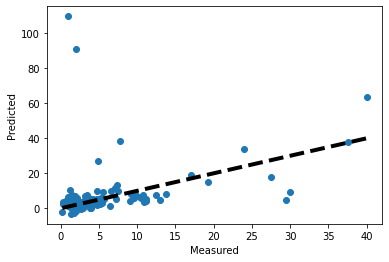

In [144]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [185]:
#tensorflow
import tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [535]:
#REMVOING NANS
X_train['TEMP'] = X_train['TEMP'].replace((np.inf, -np.inf, np.nan), X_train['TEMP'].mean()).reset_index(drop=True)
X_train['DO'] = X_train['DO'].replace((np.inf, -np.inf, np.nan), X_train['DO'].mean()).reset_index(drop=True)
X_train['pH'] = X_train['pH'].replace((np.inf, -np.inf, np.nan), X_train['pH'].mean()).reset_index(drop=True)
X_train['CONDUCTIVITY'] = X_train['CONDUCTIVITY'].replace((np.inf, -np.inf, np.nan), X_train['CONDUCTIVITY'].mean()).reset_index(drop=True)
X_test['TEMP'] = X_test['TEMP'].replace((np.inf, -np.inf, np.nan), X_test['TEMP'].mean()).reset_index(drop=True)
X_test['DO'] = X_test['DO'].replace((np.inf, -np.inf, np.nan), X_test['DO'].mean()).reset_index(drop=True)
X_test['pH'] = X_test['pH'].replace((np.inf, -np.inf, np.nan), X_test['pH'].mean()).reset_index(drop=True)
X_test['CONDUCTIVITY'] = X_test['CONDUCTIVITY'].replace((np.inf, -np.inf, np.nan), X_test['CONDUCTIVITY'].mean()).reset_index(drop=True)
y_test = y_test.replace((np.inf, -np.inf, np.nan), y_test['BOD'].mean()).reset_index(drop=True)
y_train = y_train.replace((np.inf, -np.inf, np.nan), y_train['BOD'].mean()).reset_index(drop=True)

In [186]:
print("Before Normalization: Max: ", X_train['TEMP'].max(), "Min: ", X_train['TEMP'].min())
print("Before Normalization: Max: ", X_train['DO'].max(), "Min: ", X_train['DO'].min())
print("Before Normalization: Max: ", X_train['pH'].max(), "Min: ", X_train['pH'].min())
print("Before Normalization: Max: ", X_train['CONDUCTIVITY'].max(), "Min: ", X_train['CONDUCTIVITY'].min())

Before Normalization: Max:  33.3 Min:  11.2
Before Normalization: Max:  9.3 Min:  0.0
Before Normalization: Max:  14.7 Min:  6.4
Before Normalization: Max:  24062.0 Min:  39.0


In [187]:
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X_train)  # learns mean, variance
Xn = norm_l(X_train)
X_train_normalized = pd.DataFrame(Xn)
X_train_normalized.columns = ['TEMP','DO', 'pH', 'CONDUCTIVITY']

In [188]:
print("After Normalization: Max: ", X_train_normalized['TEMP'].max(), "Min: ", X_train_normalized['TEMP'].min())
print("After Normalization: Max: ", X_train_normalized['DO'].max(), "Min: ", X_train_normalized['DO'].min())
print("After Normalization: Max: ", X_train_normalized['pH'].max(), "Min: ", X_train_normalized['pH'].min())
print("After Normalization: Max: ", X_train_normalized['CONDUCTIVITY'].max(), "Min: ", X_train_normalized['CONDUCTIVITY'].min())

After Normalization: Max:  2.385959 Min:  -4.258147
After Normalization: Max:  2.0092747 Min:  -4.4992633
After Normalization: Max:  11.518901 Min:  -2.3169422
After Normalization: Max:  11.381567 Min:  -0.33986464


In [189]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential(
    [
        Dense(4, activation='ReLU', name = 'layer1'),
        Dense(10, activation='ReLU', name = 'layer2'),
        Dense(1, activation='ReLU', name = 'layer3')
        
    ]
)

In [190]:
model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    X_train_normalized, y_train,            
    epochs=100,
)

Epoch 1/100
11/11 [==============================] - 2s 4ms/step - loss: 84.4039
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 74.0621
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 64.4660
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 54.5601
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 48.6928
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 44.1633
Epoch 7/100
11/11 [==============================] - 0s 3ms/step - loss: 40.7069
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 38.4727
Epoch 9/100
11/11 [==============================] - 0s 3ms/step - loss: 36.2321
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 34.9298
Epoch 11/100
11/11 [==============================] - 0s 3ms/step - loss: 33.6038
Epoch 12/100
11/11 [==============================] - 0s 2ms/step - loss: 32.4211
Epoch 13/100
11/11 [=====

In [191]:
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)

In [192]:
for i in range(150):
    print(predictions[i], y_test.iloc[i])

[2.4505067] BOD    1.3
Name: 100, dtype: float64
[0.] BOD    2.8
Name: 278, dtype: float64
[2.2622595] BOD    0.8
Name: 307, dtype: float64
[3.4003286] BOD    1.3
Name: 470, dtype: float64
[2.9473524] BOD    2.1
Name: 360, dtype: float64
[3.6547832] BOD    3.6
Name: 15, dtype: float64
[2.679753] BOD    4.6
Name: 340, dtype: float64
[2.1934953] BOD    1.1
Name: 523, dtype: float64
[49.37468] BOD    24.0
Name: 176, dtype: float64
[2.5506139] BOD    1.1
Name: 169, dtype: float64
[10.729466] BOD    4.7
Name: 265, dtype: float64
[2.2540755] BOD    2.4
Name: 274, dtype: float64
[3.5143595] BOD    3.5
Name: 453, dtype: float64
[2.5005841] BOD    4.9
Name: 313, dtype: float64
[2.743338] BOD    2.1
Name: 190, dtype: float64
[5.2691455] BOD    5.7
Name: 351, dtype: float64
[12.456236] BOD    6.6
Name: 499, dtype: float64
[2.6146908] BOD    1.0
Name: 377, dtype: float64
[2.345726] BOD    1.4
Name: 170, dtype: float64
[2.3343768] BOD    1.4
Name: 47, dtype: float64
[39.650463] BOD    37.5
Name: 22

IndexError: index 149 is out of bounds for axis 0 with size 149

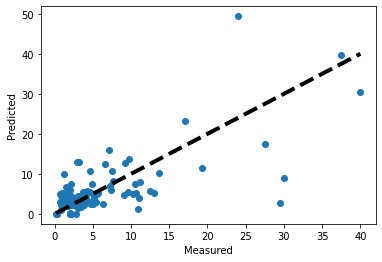

In [193]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [107]:
predictions.max()

1.7212646

In [154]:
poly_features_tensor = poly.fit_transform(X_train_normalized)
poly_features_test_tensor = poly.fit_transform(X_testn)
poly_features_tensor.shape, poly_features_test_tensor.shape

((347, 34), (149, 34))

In [155]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model_poly = Sequential(
    [
        Dense(34, activation='ReLU', name = 'layer1'),
        Dense(10, activation='ReLU', name = 'layer2'),
        Dense(1, activation='ReLU', name = 'layer3')
        
    ]
)

In [156]:
model_poly.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model_poly.fit(
    poly_features_tensor, y_train,            
    epochs=50,
)



Epoch 1/50
11/11 [==============================] - 0s 2ms/step - loss: 1778.2291
Epoch 2/50
11/11 [==============================] - 0s 2ms/step - loss: 591.1942
Epoch 3/50
11/11 [==============================] - 0s 2ms/step - loss: 142.6601
Epoch 4/50
11/11 [==============================] - 0s 2ms/step - loss: 52.5036
Epoch 5/50
11/11 [==============================] - 0s 2ms/step - loss: 28.8527
Epoch 6/50
11/11 [==============================] - 0s 2ms/step - loss: 25.0927
Epoch 7/50
11/11 [==============================] - 0s 2ms/step - loss: 22.6458
Epoch 8/50
11/11 [==============================] - 0s 2ms/step - loss: 21.5949
Epoch 9/50
11/11 [==============================] - 0s 2ms/step - loss: 19.8386
Epoch 10/50
11/11 [==============================] - 0s 2ms/step - loss: 18.5970
Epoch 11/50
11/11 [==============================] - 0s 2ms/step - loss: 19.2544
Epoch 12/50
11/11 [==============================] - 0s 2ms/step - loss: 17.3687
Epoch 13/50
11/11 [==============

In [157]:
predictions_poly = model_poly.predict(poly_features_test_tensor)

In [158]:
for i in range(150):
    print(predictions_poly[i], y_test.iloc[i])

[1.0847237] BOD    1.3
Name: 100, dtype: float64
[0.73458576] BOD    2.8
Name: 278, dtype: float64
[1.1548456] BOD    0.8
Name: 307, dtype: float64
[3.042403] BOD    1.3
Name: 470, dtype: float64
[3.1795847] BOD    2.1
Name: 360, dtype: float64
[2.864065] BOD    3.6
Name: 15, dtype: float64
[3.8741705] BOD    4.6
Name: 340, dtype: float64
[1.7891654] BOD    1.1
Name: 523, dtype: float64
[50.779205] BOD    24.0
Name: 176, dtype: float64
[2.9107344] BOD    1.1
Name: 169, dtype: float64
[8.626752] BOD    4.7
Name: 265, dtype: float64
[2.303626] BOD    2.4
Name: 274, dtype: float64
[3.3829386] BOD    3.5
Name: 453, dtype: float64
[3.25744] BOD    4.9
Name: 313, dtype: float64
[3.4526942] BOD    2.1
Name: 190, dtype: float64
[5.6354027] BOD    5.7
Name: 351, dtype: float64
[14.295264] BOD    6.6
Name: 499, dtype: float64
[0.1673052] BOD    1.0
Name: 377, dtype: float64
[2.6500025] BOD    1.4
Name: 170, dtype: float64
[1.5918573] BOD    1.4
Name: 47, dtype: float64
[41.646576] BOD    37.5
Na

IndexError: index 149 is out of bounds for axis 0 with size 149

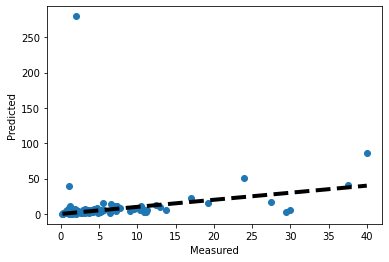

In [159]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_poly)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

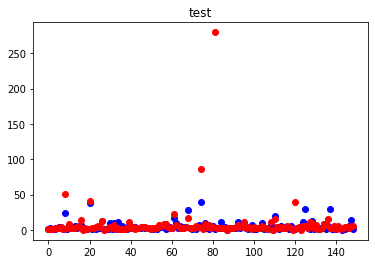

In [160]:
def plotGraph(y_test,y_pred,regressorName):
    
    plt.scatter(range(len(y_test)), y_test, color='blue', label = 'Actual')
    plt.scatter(range(len(y_pred)), y_pred, color='red', label = 'Predicted')
    plt.title(regressorName)
    fig.legend(labels = ('Actual','Predicted'),loc='upper left')
    plt.show()
    return


plotGraph(y_test, predictions_poly, "test")